In [1]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression
import warnings
warnings.simplefilter("ignore")

# Generate sample data
X, y = make_regression(n_samples=100, n_features=1, noise=0.1)

# Fit the model
model = LinearRegression()
model.fit(X, y)

# Calculate AIC
n = len(y)
k = len(model.coef_) + 1  # Adding 1 for the intercept
mse = np.mean((model.predict(X) - y)**2)
log_likelihood = -n/2 * np.log(2 * np.pi * mse) - n/2
aic = 2*k - 2*log_likelihood
print(f"AIC for Linear Regression: {aic}")

AIC for Linear Regression: -169.17441650632605


In [2]:
from sklearn.preprocessing import PolynomialFeatures

# Generate polynomial features
poly = PolynomialFeatures(degree=12)
X_poly = poly.fit_transform(X)

# Fit the model
model_poly = LinearRegression()
model_poly.fit(X_poly, y)

# Calculate AIC for polynomial regression
k_poly = len(model_poly.coef_)
mse_poly = np.mean((model_poly.predict(X_poly) - y)**2)
log_likelihood_poly = -n/2 * np.log(2 * np.pi * mse_poly) - n/2
aic_poly = 2*k_poly - 2*log_likelihood_poly
print(f"AIC for Polynomial Regression: {aic_poly}")

AIC for Polynomial Regression: -166.4037294844702


Mean Squared Error: 18.416967796017616


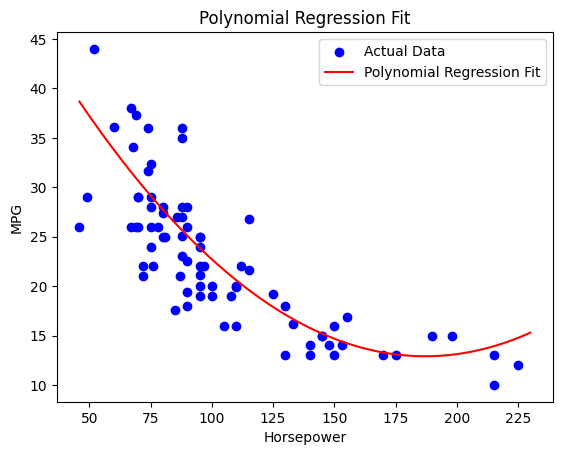

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('/content/auto-mpg.data', delim_whitespace=True, header=None)
data.columns = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight', 'Acceleration', 'Model Year', 'Origin', 'Car Name']

# Convert 'Horsepower' to numeric and handle missing values
data['Horsepower'] = pd.to_numeric(data['Horsepower'], errors='coerce')
data.dropna(inplace=True)

# Split data
X = data[['Horsepower']]
y = data['MPG']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Polynomial feature transformation
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Train the model
model = LinearRegression()
model.fit(X_train_poly, y_train)

# Predict
y_pred = model.predict(X_test_poly)

# Evaluate
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Visualization
plt.scatter(X_test, y_test, color='blue', label='Actual Data')

# Generate a sequence of values for 'Horsepower' and predict 'MPG' for plotting the curve
x_sequence = np.linspace(X['Horsepower'].min(), X['Horsepower'].max(), 300).reshape(-1, 1)
y_sequence_pred = model.predict(poly.transform(x_sequence))

plt.plot(x_sequence, y_sequence_pred, color='red', label='Polynomial Regression Fit')
plt.xlabel('Horsepower')
plt.ylabel('MPG')
plt.title('Polynomial Regression Fit')
plt.legend()
plt.show()

# Nouvelle section